## COMP5328 - Advanced Machine Learning
## Assignment 1: Non-negative Matrix Factorization
----------------------------------------------------------------------------------------

**(Semester 2, 2020)**

In this ipython notebook, we provide some example code for assignment1.
+ Load Data.
    - ORL dataset. 
    - Extended YaleB dataset. 
    - AR dataset (**optional**).
+ Perform Evaluation. 
   - Relative Reconstruction Errors.
   - Accuracy, NMI (**optional**).

Lecturer: Tongliang Liu.

Tutors: Nicholas James, Songhua Wu, Xuefeng Li, Yu Yao.

**Note: All datasets can be used only for this assignment and you are not allowed to distribute these datasets. If you want to use AR dataset, you need to apply it by yourself (we do not provide AR dataset due to the problem of license, please find more details in http://www2.ece.ohio-state.edu/~aleix/ARdatabase.html).**

## 0. Load Modules

In [84]:
# autoreload for modules
%load_ext autoreload
%autoreload 2

# Define your functions in organised individual python files. Don't throw them randomly in the notebook

## Import image processing modules
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
os.chdir("C:\\Users\\debadutta\\Documents\\GitHub\\COMP5328NMF\src")

from utils.misc import load_data, load_data_AR

## Import Algorithms
from algs import NmfHyperEstimator, NmfL2Estimator

#Import preprocessing
from preprocessing import noise, preprocess

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load Dataset

### 1.0 Data Folder

In [2]:
# The structure of data folder.
!ls -l data

'ls' is not recognized as an internal or external command,
operable program or batch file.


### 1.1 Load ORL Dataset and Extended YaleB Dataset.
+ ORL dataset contains ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). The size of each image is 92x112 pixels, with 256 grey levels per pixel. To further reduce the computation complexity, you can resize all images to 30x37 pixels.

+ Extended YaleB dataset contains 2414 images of 38 human subjects under 9 poses and 64 illumination conditions. All images are manually aligned, cropped, and then resized to 168x192 pixels. To further reduce the computation complexity, you can resize all images to 42x48 pixels.

In [3]:
# Load ORL dataset.
X, Y = load_data(root='data/ORL', reduce=2)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

# Load Extended YaleB dataset.
X, Y = load_data(root='data/CroppedYaleB', reduce=4)
print('Extended YalB dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

ORL dataset: X.shape = (2576, 400), Y.shape = (400,)
Extended YalB dataset: X.shape = (2016, 2414), Y.shape = (2414,)


### 1.2 Load AR Dataset (Optional) 
AR dataset contains 2600 images of 100 individuals (50 male and 50 female). All images have been cropped and resized to 120x165 pixels. To further reduce the computation complexity, you can resize all images to 40x55 pixels.

In [4]:
# X, Y = load_data_AR(root='data/CroppedAR', reduce=3)
# print('AR dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

## 2. Evaluation Metrics


### 2.1 Relative Reconstruction Errors (RRE)

To compare the robustness of different NMF algorithms, you can use the ```relative reconstruction errors```. Let $V$ denote the contaminated dataset (by adding noise), and $\hat{V}$
 denote the clean dataset. Let $W$ and $H$ denote the factorization results on $V$, the ``relative reconstruction errors`` then can be defined as follows:
 \begin{equation}
    RRE = \frac{ \| \hat{V} - WH \|_F }{ \| \hat{V} \|_F}.
\end{equation}


In [88]:
# Load dataset.
print('==> Load ORL dataset ...')
V_hat, Y_hat = load_data('data/ORL', reduce=3)
print('V_hat.shape={}, Y_hat.shape={}'.format(V_hat.shape, Y_hat.shape))

data = preprocess(V_hat)
V_hat = data.normalise()
print('V_hat.shape={}, Y_hat.shape={}'.format(V_hat.shape, Y_hat.shape))

# Add Noise.
#V_noise = np.random.rand(*V_hat.shape) * 40
#V = V_hat + V_noise
#noise2 = noise(image=V_hat, p=0.2, r=0.3)
#V = noise2.add_snp()

#Evaluate NmfHyper
#print('==> Apply NmfHyper ...')
#model = NmfHyperEstimator(n_components=len(set(Y_hat))) # set n_components to num_classes.
#W = model.fit_transform(V)
#H = model.components_
# Evaluate relative reconstruction errors.
#RRE = np.linalg.norm(V_hat - W.dot(H)) / np.linalg.norm(V_hat)
# Assign cluster labels.
#Y_pred = assign_cluster_label(H.T, Y_hat)
#acc = accuracy_score(Y_hat, Y_pred)
#nmi = normalized_mutual_info_score(Y_hat, Y_pred)
#print('Acc(NMI) = {:.4f} ({:.4f})'.format(acc, nmi))

# Plot result.
#img_size = [i//3 for i in (92, 112)] # ORL
#ind = 2 # index of demo image.
#plt.figure(figsize=(10,3))
#plt.subplot(131)
#plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
#plt.title('Image(Original)')
#plt.subplot(132)
#plt.imshow(V_noise[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
#plt.title('Noise')
#plt.subplot(133)
#plt.imshow(V[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
#plt.title('Image(Noise) p = 0.2 r=0.3')
#plt.show()

==> Load ORL dataset ...
V_hat.shape=(1110, 400), Y_hat.shape=(400,)
V_hat.shape=(1110, 400), Y_hat.shape=(400,)


### 2.2 Evaluate Clustering Performance

1. Accuracy.
    
    $$ Acc(Y, Y_{pred}) = \frac{1}{n}\sum\limits_{i=1}^n 1\{Y_{pred}(i) == Y(i)\}$$
        
2. Normalized Mutual Information (NMI).

    $$ NMI(Y, Y_{pred}) = \frac{2 * I(Y, Y_{pred})}{H(Y) + H(Y_{pred})} $$
    
   where $ I(\cdot,\cdot) $ is mutual information and $ H(\cdot) $ is entropy.

In [89]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import normalized_mutual_info_score

def assign_cluster_label(X, Y):
    kmeans = KMeans(n_clusters=len(set(Y))).fit(X)
    Y_pred = np.zeros(Y.shape)
    for i in set(kmeans.labels_):
        ind = kmeans.labels_ == i
        Y_pred[ind] = Counter(Y[ind]).most_common(1)[0][0] # assign label.
    return Y_pred

In [90]:
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Calculating RRE with noisy data
n = V_hat.shape[1]
arr = np.arange(n)

noise_levels = np.arange(0, 1, 0.2)

RRE_nmf_mean = []
RRE_nmf_std = []
acc_nmf_mean = []
acc_nmf_std = []
nmi_nmf_mean = []
nmi_nmf_std = []
RRE_L2_mean = []
RRE_L2_std = []
acc_L2_mean = []
acc_L2_std = []
nmi_L2_mean = []
nmi_L2_std = []
RRE_hyper_mean = []
RRE_hyper_std = []
acc_hyper_mean = []
acc_hyper_std = []
nmi_hyper_mean = []
nmi_hyper_std = []

for i in noise_levels:
    rre_nmf_list = np.empty(5)
    acc_nmf_list = np.empty(5)
    nmi_nmf_list = np.empty(5)
    rre_L2_list = np.empty(5)
    acc_L2_list = np.empty(5)
    nmi_L2_list = np.empty(5)
    rre_hyper_list = np.empty(5)
    acc_hyper_list = np.empty(5)
    nmi_hyper_list = np.empty(5)    
    
    for j in range(5):

        np.random.shuffle(arr)                #Shuffling the dataset
        ntr = int(0.9*n)                      #Taking only 90% from the shuffled data
        V_hat_smaller = V_hat.T[arr[:ntr]].T
        Y_hat_smaller = Y_hat[arr[:ntr]]
        
        #Adding noise to the data for testing
        noiseObj = noise(image=V_hat_smaller, p=i, r=0.3)
        V = noiseObj.add_snp()

        #Evaluating NMF from sklearn
        print("Iteration number:", i, j)
        print('==> Apply NMF ...')
        model = NMF(n_components=len(set(Y_hat_smaller))) # set n_components to num_classes.
        W = model.fit_transform(V)
        H = model.components_
        #print('W.shape={}, H.shape={}'.format(W.shape, H.shape))
        #Evaluate relative reconstruction errors.
        #print('==> Evaluate RRE ...')
        RRE = np.linalg.norm(V_hat_smaller - W.dot(H)) / np.linalg.norm(V_hat_smaller)
        #print('RRE = {}'.format(RRE))
        #print('==> Evaluate Acc and NMI for NMF ...')
        # Assign cluster labels.
        Y_pred = assign_cluster_label(H.T, Y_hat_smaller)
        acc = accuracy_score(Y_hat_smaller, Y_pred)*100
        nmi = normalized_mutual_info_score(Y_hat_smaller, Y_pred)*100
        print('Acc(NMI) = {:.4f} ({:.4f})'.format(acc, nmi))
        rre_nmf_list[j] = RRE
        acc_nmf_list[j] = acc
        nmi_nmf_list[j] = nmi

        #Evaluating NmfL2
        print('==> Apply NmfL2 ...')
        model = NmfL2Estimator(n_components=len(set(Y_hat_smaller))) # set n_components to num_classes.
        W = model.fit_transform(V)
        H = model.components_
        # Evaluate relative reconstruction errors.
        #print('==> Evaluate RRE ...')
        RRE = np.linalg.norm(V_hat_smaller - W.dot(H)) / np.linalg.norm(V_hat_smaller)
        # Assign cluster labels.
        Y_pred = assign_cluster_label(H.T, Y_hat_smaller)
        acc = accuracy_score(Y_hat_smaller, Y_pred)*100
        nmi = normalized_mutual_info_score(Y_hat_smaller, Y_pred)*100
        print('Acc(NMI) = {:.4f} ({:.4f})'.format(acc, nmi))
        rre_L2_list[j] = RRE
        acc_L2_list[j] = acc
        nmi_L2_list[j] = nmi        

        #Evaluate NmfHyper
        print('==> Apply NmfHyper ...')
        model = NmfHyperEstimator(n_components=len(set(Y_hat_smaller))) # set n_components to num_classes.
        W = model.fit_transform(V)
        H = model.components_
        # Evaluate relative reconstruction errors.
        RRE = np.linalg.norm(V_hat_smaller - W.dot(H)) / np.linalg.norm(V_hat_smaller)
        # Assign cluster labels.
        Y_pred = assign_cluster_label(H.T, Y_hat_smaller)
        acc = accuracy_score(Y_hat_smaller, Y_pred)*100
        nmi = normalized_mutual_info_score(Y_hat_smaller, Y_pred)*100
        print('Acc(NMI) = {:.4f} ({:.4f})'.format(acc, nmi))
        rre_hyper_list[j] = RRE
        acc_hyper_list[j] = acc
        nmi_hyper_list[j] = nmi        
        
    RRE_nmf_mean.append(np.mean(rre_nmf_list))
    RRE_nmf_std.append(np.std(rre_nmf_list))
    acc_nmf_mean.append(np.mean(acc_nmf_list))
    acc_nmf_std.append(np.std(acc_nmf_list))
    nmi_nmf_mean.append(np.mean(nmi_nmf_list))
    nmi_nmf_std.append(np.std(nmi_nmf_list))

    RRE_L2_mean.append(np.mean(rre_L2_list))
    RRE_L2_std.append(np.std(rre_L2_list))
    acc_L2_mean.append(np.mean(acc_L2_list))
    acc_L2_std.append(np.std(acc_L2_list))
    nmi_L2_mean.append(np.mean(nmi_L2_list))
    nmi_L2_std.append(np.std(nmi_L2_list)) 
    
    RRE_hyper_mean.append(np.mean(rre_hyper_list))
    RRE_hyper_std.append(np.std(rre_hyper_list))
    acc_hyper_mean.append(np.mean(acc_hyper_list))
    acc_hyper_std.append(np.std(acc_hyper_list))
    nmi_hyper_mean.append(np.mean(nmi_hyper_list))
    nmi_hyper_std.append(np.std(nmi_hyper_list)) 

C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


Iteration number: 0.0 0
==> Apply NMF ...


G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 64.7222 (78.7486)
==> Apply NmfL2 ...
Acc(NMI) = 72.5000 (85.2861)
==> Apply NmfHyper ...
Acc(NMI) = 18.8889 (37.6043)
Iteration number: 0.0 1
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 68.0556 (82.2146)
==> Apply NmfL2 ...
Acc(NMI) = 78.8889 (88.3769)
==> Apply NmfHyper ...
Acc(NMI) = 17.5000 (36.7664)
Iteration number: 0.0 2
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 66.1111 (78.4837)
==> Apply NmfL2 ...
Acc(NMI) = 74.4444 (85.9474)
==> Apply NmfHyper ...
Acc(NMI) = 19.7222 (36.8227)
Iteration number: 0.0 3
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 72.7778 (83.4247)
==> Apply NmfL2 ...
Acc(NMI) = 70.5556 (84.1659)
==> Apply NmfHyper ...
Acc(NMI) = 18.8889 (38.0012)
Iteration number: 0.0 4
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 67.7778 (81.1811)
==> Apply NmfL2 ...
Acc(NMI) = 75.0000 (85.9593)
==> Apply NmfHyper ...
Acc(NMI) = 20.8333 (38.7749)
Iteration number: 0.2 0
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 61.1111 (75.8990)
==> Apply NmfL2 ...
Acc(NMI) = 54.7222 (72.7501)
==> Apply NmfHyper ...
Acc(NMI) = 17.7778 (34.5928)
Iteration number: 0.2 1
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 58.0556 (73.7246)
==> Apply NmfL2 ...
Acc(NMI) = 60.8333 (76.5607)
==> Apply NmfHyper ...
Acc(NMI) = 18.0556 (35.2772)
Iteration number: 0.2 2
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 61.1111 (75.8419)
==> Apply NmfL2 ...
Acc(NMI) = 60.2778 (74.1674)
==> Apply NmfHyper ...
Acc(NMI) = 17.5000 (35.6868)
Iteration number: 0.2 3
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 62.5000 (75.5936)
==> Apply NmfL2 ...
Acc(NMI) = 61.6667 (74.8779)
==> Apply NmfHyper ...
Acc(NMI) = 17.2222 (35.7143)
Iteration number: 0.2 4
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 61.6667 (77.0593)
==> Apply NmfL2 ...
Acc(NMI) = 59.4444 (76.4401)
==> Apply NmfHyper ...
Acc(NMI) = 17.7778 (35.6499)
Iteration number: 0.4 0
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 40.0000 (57.8111)
==> Apply NmfL2 ...
Acc(NMI) = 40.0000 (58.3009)
==> Apply NmfHyper ...
Acc(NMI) = 18.3333 (38.2311)
Iteration number: 0.4 1
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 43.0556 (61.4198)
==> Apply NmfL2 ...
Acc(NMI) = 37.7778 (57.4836)
==> Apply NmfHyper ...
Acc(NMI) = 17.5000 (36.1398)
Iteration number: 0.4 2
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 40.0000 (57.9483)
==> Apply NmfL2 ...
Acc(NMI) = 42.2222 (60.3001)
==> Apply NmfHyper ...
Acc(NMI) = 18.6111 (36.1458)
Iteration number: 0.4 3
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 44.4444 (60.2796)
==> Apply NmfL2 ...
Acc(NMI) = 43.0556 (60.0108)
==> Apply NmfHyper ...
Acc(NMI) = 16.6667 (33.1401)
Iteration number: 0.4 4
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 38.6111 (57.2997)
==> Apply NmfL2 ...
Acc(NMI) = 41.3889 (59.7370)
==> Apply NmfHyper ...
Acc(NMI) = 17.5000 (34.6600)
Iteration number: 0.6000000000000001 0
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 28.3333 (49.2936)
==> Apply NmfL2 ...
Acc(NMI) = 28.8889 (47.4067)
==> Apply NmfHyper ...
Acc(NMI) = 19.1667 (38.4899)
Iteration number: 0.6000000000000001 1
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 33.3333 (52.1997)
==> Apply NmfL2 ...
Acc(NMI) = 28.0556 (47.4401)
==> Apply NmfHyper ...
Acc(NMI) = 18.3333 (36.5043)
Iteration number: 0.6000000000000001 2
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 33.6111 (51.9512)
==> Apply NmfL2 ...
Acc(NMI) = 30.5556 (47.8480)
==> Apply NmfHyper ...
Acc(NMI) = 18.6111 (38.6931)
Iteration number: 0.6000000000000001 3
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 29.1667 (48.0550)
==> Apply NmfL2 ...
Acc(NMI) = 29.4444 (49.3454)
==> Apply NmfHyper ...
Acc(NMI) = 17.7778 (34.7128)
Iteration number: 0.6000000000000001 4
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 29.4444 (48.2923)
==> Apply NmfL2 ...
Acc(NMI) = 29.1667 (48.8328)
==> Apply NmfHyper ...
Acc(NMI) = 18.0556 (38.3393)
Iteration number: 0.8 0
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 24.4444 (42.7001)
==> Apply NmfL2 ...
Acc(NMI) = 23.6111 (41.5672)
==> Apply NmfHyper ...
Acc(NMI) = 16.9444 (35.3437)
Iteration number: 0.8 1
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 24.1667 (43.7581)
==> Apply NmfL2 ...
Acc(NMI) = 23.6111 (42.6814)
==> Apply NmfHyper ...
Acc(NMI) = 18.0556 (33.4312)
Iteration number: 0.8 2
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 26.6667 (44.2539)
==> Apply NmfL2 ...
Acc(NMI) = 26.6667 (44.3140)
==> Apply NmfHyper ...
Acc(NMI) = 17.7778 (36.8437)
Iteration number: 0.8 3
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 25.0000 (43.4867)
==> Apply NmfL2 ...
Acc(NMI) = 25.2778 (44.6929)
==> Apply NmfHyper ...
Acc(NMI) = 17.2222 (34.8085)
Iteration number: 0.8 4
==> Apply NMF ...


C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\debadutta\Documents\GitHub\COMP5328NMF\src\preprocessing\saltnpepper.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0
G:\Python\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Acc(NMI) = 24.4444 (42.1302)
==> Apply NmfL2 ...
Acc(NMI) = 23.3333 (41.7378)
==> Apply NmfHyper ...
Acc(NMI) = 18.6111 (35.6765)


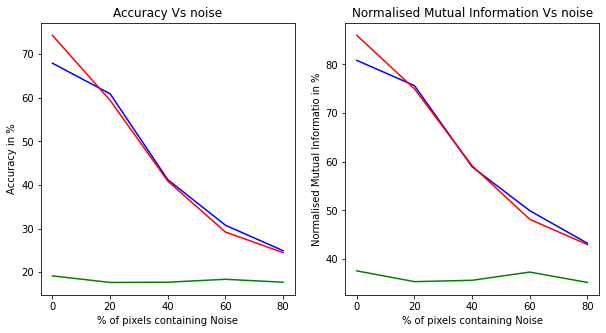

In [91]:
import matplotlib.pyplot as plt

noise_levels = np.arange(0, 1, 0.2)
noise_levels_mod = (noise_levels * 100).tolist()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(noise_levels_mod, acc_nmf_mean, color='blue')
axes[0].plot(noise_levels_mod, acc_L2_mean, color='red')
axes[0].plot(noise_levels_mod, acc_hyper_mean, color='green')
axes[1].plot(noise_levels_mod, nmi_nmf_mean, color='blue')
axes[1].plot(noise_levels_mod, nmi_L2_mean, color='red')
axes[1].plot(noise_levels_mod, nmi_hyper_mean, color='green')

axes[0].set_xlabel("% of pixels containing Noise")
axes[0].set_ylabel("Accuracy in %")
axes[0].set_title("Accuracy Vs noise")
axes[1].set_xlabel("% of pixels containing Noise")
axes[1].set_ylabel("Normalised Mutual Informatio in %")
axes[1].set_title("Normalised Mutual Information Vs noise")
plt.show()